In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,Activation

In [2]:
#set dir path where my images are saved
datadir="C:/Users/Asus/MENS_WEAR/train"
categories=["Jeans","Trouser"]



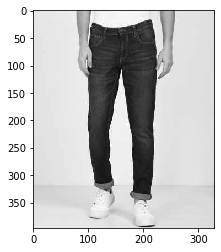

In [3]:
#read the images and converting them into grayscale
for category in categories:
    path=os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show
        break
    break

In [4]:
print(img_array.shape)

(396, 330)


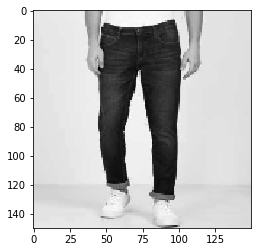

In [5]:

IMG_SIZE=150

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
#creating our training data for model training and also normalize the data for further processing.
training_data=[]

def create_training_data():
    for category in categories:
        path=os.path.join(datadir,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
 
    

In [7]:
len(training_data)

960

In [8]:
#set dir path where my images are saved
data_dir="C:/Users/Asus/MENS_WEAR/validation"
categories=["Jeans","Trouser"]



In [9]:
#creating our training data for model training and also normalize the data for further processing.
validation_data=[]

def create_validation_data():
    for category in categories:
        path=os.path.join(data_dir,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                validation_data.append([new_array,class_num])
            except Exception as e:
                pass
create_validation_data()
 
    

In [10]:
len(validation_data)

40

In [11]:
#from preventing the overfitting and underfitting we have to shuffle the data 
import random
random.shuffle(training_data)

In [12]:
#from preventing the overfitting and underfitting we have to shuffle the data 
import random
random.shuffle(validation_data)

In [13]:
#checking labels
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
0
1
0
1
0


In [14]:
#checking labels
for sample in validation_data[:10]:
    print(sample[1])

0
0
1
1
0
0
1
0
1
1


In [15]:
x_train=[]
y_train=[]

In [16]:
#making x and y for training the model
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)

In [17]:
len(x_train)

960

In [18]:
len(y_train)

960

In [19]:
x_validation=[]
y_validation=[]

In [20]:
#making x and y for training the model
for features,label in validation_data:
    x_validation.append(features)
    y_validation.append(label)

In [21]:
len(x_validation)

40

In [22]:
len(y_validation)

40

In [23]:
x_train=np.array(x_train)

In [24]:
x_train.shape

(960, 150, 150)

In [25]:
x_validation=np.array(x_validation)

In [26]:
x_validation.shape

(40, 150, 150)

In [27]:
x_train=x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1)

In [28]:
x_validation=x_validation.reshape(x_validation.shape[0],IMG_SIZE,IMG_SIZE,1)

In [29]:
x_train=x_train.astype('float32')

In [30]:
x_validation=x_validation.astype('float32')

In [31]:
x_train=x_train/255

In [32]:
x_validation=x_validation/255

In [33]:
x_train.shape

(960, 150, 150, 1)

In [34]:
x_validation.shape

(40, 150, 150, 1)

In [35]:
num_class=2

In [36]:
y_train=tf.keras.utils.to_categorical(y_train,num_class)
y_validation=tf.keras.utils.to_categorical(y_validation,num_class)

In [37]:
y_train.shape

(960, 2)

In [38]:
y_validation.shape

(40, 2)

In [56]:
batch_size=32
epochs=10
input_shape=(IMG_SIZE,IMG_SIZE,1)

In [57]:
#creating model
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),
                activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(num_class,activation='softmax'))

model.summary()


#compilation of model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 146, 146, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4735040   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [58]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,
            validation_data=(x_validation,y_validation))
score= model.evaluate(x_validation,y_validation,verbose=0)
print('test loss',score[0])
print('test accuracy',score[1])

Epoch 1/10
30/30 [==============================] - 35s 1s/step - loss: 0.7497 - accuracy: 0.5823 - val_loss: 0.6303 - val_accuracy: 0.6500
Epoch 2/10
30/30 [==============================] - 32s 1s/step - loss: 0.5357 - accuracy: 0.7240 - val_loss: 0.5295 - val_accuracy: 0.7500
Epoch 3/10
30/30 [==============================] - 32s 1s/step - loss: 0.3532 - accuracy: 0.8375 - val_loss: 0.4555 - val_accuracy: 0.8250
Epoch 4/10
30/30 [==============================] - 31s 1s/step - loss: 0.2035 - accuracy: 0.9281 - val_loss: 0.6662 - val_accuracy: 0.7250
Epoch 5/10
30/30 [==============================] - 31s 1s/step - loss: 0.1224 - accuracy: 0.9510 - val_loss: 0.6834 - val_accuracy: 0.7500
Epoch 6/10
30/30 [==============================] - 33s 1s/step - loss: 0.1052 - accuracy: 0.9625 - val_loss: 0.9582 - val_accuracy: 0.7500
Epoch 7/10
30/30 [==============================] - 34s 1s/step - loss: 0.0712 - accuracy: 0.9792 - val_loss: 0.8553 - val_accuracy: 0.7500
Epoch 8/10
30/30 [==

In [45]:
len(x_train)

960

In [46]:
#saving the model
model.save("mens_WEAR.h5")
print('Model saved')

Model saved


In [47]:
#Loading the model

import tensorflow as tf 
classifier = tf.keras.models.load_model('mens_WEAR.h5')

In [59]:
import cv2
import numpy as np

def draw_test(name,res,input_im):
    BLACK=[0,0,0]
    res=int(res)
    if res==0:
        pred="Jeans"
    if res==1:
        pred="Trouser"
    expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0]*2, cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    
    
for i in range (0,10):
    rand=np.random.randint(0,len(x_train))
    input_im=x_train[rand]
    
    imageL=cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    input_im=input_im.reshape(1,150,150,1)
    
    #get prediction
    res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
    
    draw_test("Prediction",res,imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()